# Nivel 1

## Ejercicio 1

### *Coge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos. Calcula la moda, la mediana, la desviacion estandard, y la mediana aritmetica*

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
marathon_df = pd.read_csv('Dataset-Boston-2019.csv')
marathon_df

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN
...,...,...,...,...,...,...,...,...
26646,26640,44,F,United States,6:21:19,22879,11977,USA
26647,26641,50,F,United States,6:22:27,22947,11978,USA
26648,26648,32,F,United States,6:35:50,23750,11979,USA
26649,26650,55,F,United States,6:53:38,24818,11980,USA


In [3]:
marathon_df = marathon_df[['Age', 'Gender', 'Result_sec']]
marathon_df

,Age,Gender,Result_sec
0,30,M,7677
1,29,M,7679
2,34,M,7687
3,32,M,7734
4,26,M,7735
...,...,...,...
26646,44,F,22879
26647,50,F,22947
26648,32,F,23750
26649,55,F,24818


In [4]:
Age_df = marathon_df['Age']
Age_df

0        30
1        29
2        34
3        32
4        26
         ..
26646    44
26647    50
26648    32
26649    55
26650    46
Name: Age, Length: 26651, dtype: int64

#### *Moda*

In [5]:
# funcion
def mode(dataset):
    frequency = {}

    for value in dataset:
        frequency[value] = frequency.get(value, 0) + 1

    most_frequent = max(frequency.values())

    mode = [key for key, value in frequency.items()
                      if value == most_frequent]

    return mode

In [6]:
print(mode(Age_df))

[45]


In [7]:
# modulo
from statistics import mode

print(mode(Age_df))

45


#### *Mediana*

In [8]:
# funcion
def median(dataset):
    data = sorted(dataset)
    index = len(dataset) // 2
    
    # si el dataset es impar  
    if len(dataset) % 2 != 0:
        return data[index]
    
    # si el dataset es par
    return (dataset[index - 1] + dataset[index]) / 2

In [9]:
print(median(Age_df))

43


In [10]:
# modulo
from statistics import median

print(median(Age_df))

43


#### *Desviacion estandard*

In [11]:
# funcion 
def st_dev(dataset):
    mean = sum(dataset) / len(dataset)
    var = sum((l-mean)**2 for l in dataset) / len(dataset)
    st_dev = math.sqrt(var)
    
    return st_dev

In [12]:
print(st_dev(Age_df))

11.537306695601352


In [13]:
# modulo
import statistics

print(statistics.pstdev(Age_df))

11.537306695601412


#### *Media aritmetica*

In [14]:
# funcion
def mean(dataset):
    return sum(dataset) / len(dataset)

In [15]:
print(mean(Age_df))

42.79989493827624


In [16]:
# modulo
from statistics import mean

print(mean(Age_df))

42.79989493827624


## Ejercicio 2

### *Continuando con los datos de tema deportivo, selecciona dos atributos y calcula su correlación*

In [17]:
# funcion
def corr_coef(x, y):
    # convierto en array
    x = np.array(x)
    y = np.array(y)

    # tamaño
    N = len(x)

    # media aritmetica
    xm = sum(x)/N
    ym = sum(y)/N

    # desviacion estandar 
    sx = ((sum((x - xm)**2))/N)**(1/2)
    sy = ((sum((y - ym)**2))/N)**(1/2)

    # covarianza
    sxy = (sum(x * y) / N) - (xm * ym)

    # coeficiente de correlacion
    rxy = sxy / (sx * sy)

    return rxy

In [18]:
print(corr_coef(marathon_df['Age'], marathon_df['Result_sec']))

0.2610198547164375


In [19]:
# modulo
x = np.array(marathon_df['Age'])
y = np.array(marathon_df['Result_sec'])

coef_corr = np.corrcoef(x,y)
coef_corr

array([[1.        , 0.26101985],
       [0.26101985, 1.        ]])

# Nivel 2

## Ejercicio 3

### *Continuando con los datos de tema deportivo, calcula la correlacion de todos los atributos entre si i representalos en una matriz con diferentes colores de intensidad*

<AxesSubplot:>

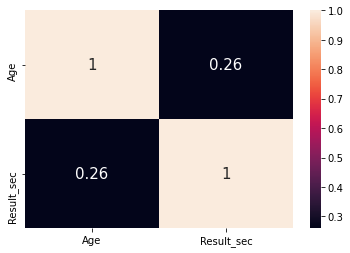

In [23]:
import seaborn as sns

corr = marathon_df.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 15})

# Nivel 3

## Ejercicio 4

### *Continuando con los datos de tema deportivo, selecciona un atributo y calcula la media geometrica y la media armonica*

In [32]:
import statistics as stats

In [33]:
# media armonica
x = np.array(marathon_df['Age'])
y = np.array(marathon_df['Result_sec'])

print("Age: " + str(stats.harmonic_mean(x)))
print("Result_sec: " + str(stats.harmonic_mean(y)))

Age: 39.52758458618296
Result_sec: 13499.418776425442


In [34]:
from scipy import stats

In [35]:
# media geometrica
x = np.array(marathon_df['Age'])
y = np.array(marathon_df['Result_sec'])

print("Age: " + str(stats.gmean(x)))
print("Result_sec: " + str(stats.gmean(y)))

Age: 41.18716947233696
Result_sec: 13733.448891852462
